In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io,color
from skimage.util import img_as_ubyte

#### loading and displaying the original image

In [6]:
image=io.imread("D:\project_pca\lights-car-vehicle-244206.jpg")
image

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\CHANDAN\AppData\Local\Temp\ipykernel_10732\4065177599.py:1: SyntaxWarning: invalid escape sequence '\p'
  image=io.imread("D:\project_pca\lights-car-vehicle-244206.jpg")


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[110, 100,  99],
        [109,  99,  98],
        [110, 100,  99],
        ...,
        [113, 112, 110],
        [118, 117, 115],
        [120, 119, 117]],

       [[113, 103, 102],
        [114, 104, 103],
        [116, 106, 105],
        ...,
        [112, 111, 109],
        [117, 116, 114],
        [120, 119, 117]],

       [[114, 104, 103],
        [115, 105, 104],
        [117, 109, 107],
        ...,
        [113, 112, 110],
        [118, 117, 115],
        [121, 120, 118]]

### converting the image to gray scale image 

In [7]:
gray_image=color.rgb2gray(image)
gray_image

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.40020745, 0.39628588, 0.40020745, ..., 0.43948353, 0.45909137,
        0.46693451],
       [0.41197216, 0.41589373, 0.42373686, ..., 0.43556196, 0.4551698 ,
        0.46693451],
       [0.41589373, 0.41981529, 0.43355216, ..., 0.43948353, 0.45909137,
        0.47085608]])

In [8]:
gray_image.shape

(3376, 6000)

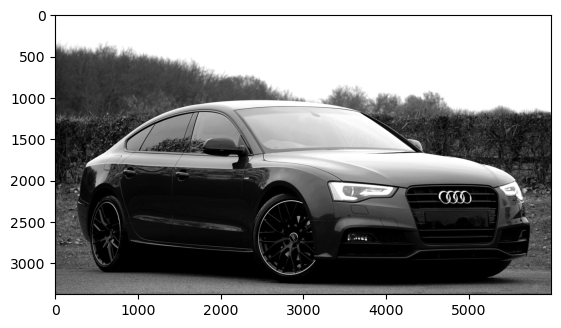

In [9]:
plt.imshow(gray_image,cmap="gray")

#### converting to text data 

In [10]:
flaten_image=gray_image.reshape(gray_image.shape[0],-1)
flaten_image

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.40020745, 0.39628588, 0.40020745, ..., 0.43948353, 0.45909137,
        0.46693451],
       [0.41197216, 0.41589373, 0.42373686, ..., 0.43556196, 0.4551698 ,
        0.46693451],
       [0.41589373, 0.41981529, 0.43355216, ..., 0.43948353, 0.45909137,
        0.47085608]])

In [11]:
flaten_image.shape

(3376, 6000)

#### creating pca object 

In [12]:
pca=PCA(n_components=0.90)    # 80% important featuture will effect

In [13]:
transformed_img_data=pca.fit_transform(gray_image)
transformed_img_data

array([[ 38.9971024 , -11.31845597,  -8.26538765,  -3.81891728,
          2.39245845],
       [ 38.9971024 , -11.31845597,  -8.26538765,  -3.81891728,
          2.39245845],
       [ 38.9971024 , -11.31845597,  -8.26538765,  -3.81891728,
          2.39245845],
       ...,
       [ -1.20793695,  -6.83887489,  -1.64429126,   0.65908218,
         -1.39170322],
       [ -1.38350109,  -6.96196489,  -1.74808332,   0.7601278 ,
         -1.13484402],
       [ -1.48776475,  -7.03217942,  -1.80400629,   0.81396156,
         -0.99684846]])

#### reconstructed image

In [14]:
transformed_img=pca.inverse_transform(transformed_img_data)

In [15]:
transformed_img

array([[0.86102109, 0.86216111, 0.86339154, ..., 1.00812058, 1.00778941,
        1.00659948],
       [0.86102109, 0.86216111, 0.86339154, ..., 1.00812058, 1.00778941,
        1.00659948],
       [0.86102109, 0.86216111, 0.86339154, ..., 1.00812058, 1.00778941,
        1.00659948],
       ...,
       [0.41587637, 0.41465017, 0.41494439, ..., 0.48048514, 0.47935103,
        0.48021842],
       [0.42171332, 0.42060993, 0.42092036, ..., 0.48297783, 0.48173211,
        0.48260725],
       [0.42488224, 0.42384508, 0.42416353, ..., 0.4841666 , 0.48286008,
        0.48373944]])

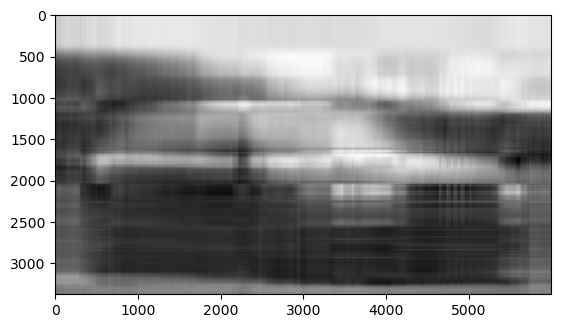

In [16]:
plt.imshow(transformed_img,cmap='gray')

In [17]:
compressed_img_normalize=((transformed_img-transformed_img.min())/(transformed_img.max()-transformed_img.min()))

In [18]:
compressed_img_normalize

array([[0.77462279, 0.77546239, 0.77636856, ..., 0.88295691, 0.88271301,
        0.88183667],
       [0.77462279, 0.77546239, 0.77636856, ..., 0.88295691, 0.88271301,
        0.88183667],
       [0.77462279, 0.77546239, 0.77636856, ..., 0.88295691, 0.88271301,
        0.88183667],
       ...,
       [0.44678782, 0.44588477, 0.44610145, ..., 0.49437013, 0.4935349 ,
        0.4941737 ],
       [0.45108655, 0.45027393, 0.45050256, ..., 0.49620592, 0.49528848,
        0.495933  ],
       [0.45342036, 0.45265652, 0.45289105, ..., 0.49708141, 0.4961192 ,
        0.49676682]])

In [19]:
bt = img_as_ubyte(compressed_img_normalize)

In [20]:
io.imsave('new_compressed_img.jpg',bt)